# Shock Tube: Initial Shock Mach Number & Velocity--Analytical Predictions
Shock tubes are initially sub-divided into two stagnant sections: a high pressure driver ($r$) section and a low pressure driven ($n$) section.  When a diaphragm separating the two sections is broken, two waves emanate from its location.  A expansion wave (fan) propagates into the driver section, and a compression (shock) wave propagates into the driven section.  Both waves have the effect of accelerating the initially stagnant gases toward the low pressure section of the tube.
 
The compression wave traveling into the driven section coalesces into a non-linear shock wave that travels in excess of the ambient speed of sound--for intial driver to driven pressure ratios ($\frac{P_{r}}{P_{n}}$) in excess of one.  An analytical expression for Mach number of this shock wave as it traverses the driven section may be derived, and the resulting expression is presented below.

$$M_{s}^2 = \frac{\gamma_{n} + 1}{2\gamma_{n}}\left( \pi + \frac{\gamma_{n} - 1}{\gamma_{n} + 1} \right) $$

The subscript $n$ indicates driven system quantities, and the subscript $r$ indicates driver system quantities.  $\gamma$ is the ratio of specific heats. $\pi$ is the static pressure ratio across the shock.

$\pi$ may be calculated from $\frac{P_{r}}{P_{n}}$ from the implicit expression below.

$$ \frac{P_{r}}{P_{n}} = \pi\left(1 - \frac{(\gamma_{r}-1)\frac{a_{n}}{a_{r}}(\pi-1)}{\sqrt{4\gamma_{n}^2+2\gamma_{n}(\gamma_{n}+1)(\pi-1)}}\right)^{\frac{-2\gamma_{r}}{\gamma_{r}-1}}$$

Both above expressions are derived in the book chapter at this Stanford [Link]( https://web.stanford.edu/~cantwell/AA210A_Course_Material/AA210A_Course_Notes/AA210_Fundamentals_of_Compressible_Flow_Ch_13_BJ_Cantwell.pdf)

Knowing the Mach number, the velocity of the shock wave relative to the initially stagnant driven gases may be then calculated from the below expression.

$$U_{s} = M_{s}\sqrt{\gamma_{n}R_{n}T_{n}}$$

## Calculation of the Initial Shock Mach Number and Velocity
A Python code is below that calculates the shock Mach number given the driven section ratio of specific heats ($\gamma_{n}$) and the initial driver to driven pressure ratio ($\frac{P_{r}}{P_{n}}$).  From the calculated shock Mach number, the shock velocity may be calculated given the gas specific gas constant ($R_{n}$) and the initial temperature ($T_{n}$) for the gas in the driven section.

In [30]:
"""Import modules used for calculation and plotting"""
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize as opt
from scipy.constants import convert_temperature

In [31]:
"""Functions used in the calculations below"""

def a(γ, R, T):
    """Speed of sound
    γ = Ratio of specific heats,
    R = Mass-specific gas contants (in J/kg for a in m/s), and 
    T = Absolute temperature (in K for a in m/s)."""
    return np.sqrt(γ * R * T)


def Residual(π,Pr_Pn,γr,Rr,Tr,γn,Rn,Tn):
    """Implicit exprssion for the shock pressure ratio (P2/P1 in traditonal 
    shock tube nomenclature).
        π = Shock pressure ratio,
        Pr_Pn = Driver to driven pressure ratio,
        γr = Driver ratio of specific heats,
        Rr = Mass-specific driver gas constant,
        Tr = Driver absolute temeperature,
        γn = Driven ratio of specific heats,
        Rn = Mass-specific driven gas constant, and
        Tn = Driven absolute temeperature."""
    #display('π = %s' % π)
    return Pr_Pn - π * ( 1 - (γr-1)*a(γn,Rn,Tn)/a(γr,Rr,Tr)*(π-1)/
                       np.sqrt(4*γn**2+2*γn*(γn+1)*(π-1)))**(-2*γr/(γr-1))


def ShockPR(Pr_Pn,γr,Rr,Tr,γn,Rn,Tn):
    """Static pressure ratio across the initial shock wave that traverses the driven section.
        Pr_Pn = Driver to driven pressure ratio,
        γr = Driver ratio of specific heats,
        Rr = Mass-specific driver gas constant,
        Tr = Driver absolute temeperature,
        γn = Driven ratio of specific heats,
        Rn = Mass-specific driven gas constant, and
        Tn = Driven absolute temeperature."""    
    return opt.anderson(lambda π: Residual(π,Pr_Pn,γr,Rr,Tr,γn,Rn,Tn), 
                        np.ones_like(Pr_Pn)*1.10) #, verbose=1)

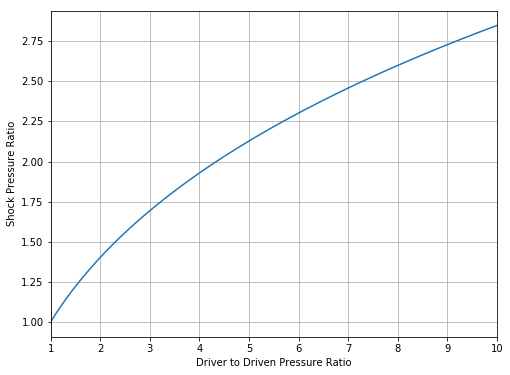

In [32]:
"""Input parameters: 
    1. driven ratio of specific heats (γ_n), 
    2. driven gas specific gas constant (R),
    3. the initial driver to driven pressure ratio (Pr_Pn), and
    4. the initial driven section temperature in degrees K"""

# Driven quantities (Ratio of specific heats, Mass-specific gas constant, Initial temperature)
γn = 1.4 # Diatomic gas (e.g. air)
Rn_J_kg = 287.5 # air 
Tn_K = convert_temperature(25,'C','K')

# Driver quantities (Ratio of specific heats, Mass-specific gas constant, Initial temperature)
γr = 1.4 # Diatomic gas (e.g. air)
Rr_J_kg = 287.5 # air 
Tr_K = convert_temperature(25,'C','K')

# Driver to driven pressure ratio (P4/P1 in traditional shock tube nomenclature)
Pr_Pn = np.linspace(1,10,100)

# Calculate the shock pressure ratio
π = ShockPR(Pr_Pn,γr,Rr_J_kg,Tr_K,γn,Rn_J_kg,Tn_K)

# Plot shock pressure ratio vs driver to driven pressure ratio
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(Pr_Pn,π)
ax1.set_xlabel('Driver to Driven Pressure Ratio')
ax1.set_ylabel('Shock Pressure Ratio')
ax1.set_xlim(left=np.min(Pr_Pn),right=np.max(Pr_Pn))
ax1.grid()
plt.show()

# Lambda function definitions: shock Mach number & shock velocity (m/s)
Mshock = lambda γ, π: np.sqrt((γ + 1) / 2 / γ * (π + (γ - 1) / (γ + 1)))
Ushock_m_s = lambda M, γ, R, T_K: M * np.sqrt( γ * R * T_K)

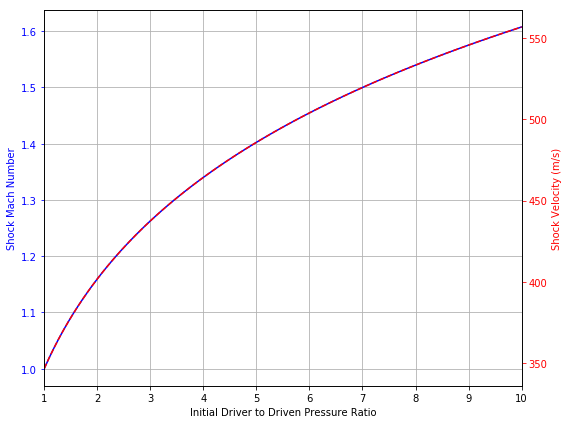

In [33]:
 """Shock Mach number & Velocity Double-Y plot"""
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(Pr_Pn,Mshock(γn,π),'b-',label='Shock Mach Number')
ax1.set_xlim(left=np.min(Pr_Pn),right=np.max(Pr_Pn))
ax1.set_xlabel('Initial Driver to Driven Pressure Ratio')
ax1.set_ylabel('Shock Mach Number',color='b')
ax1.tick_params('y', colors='b')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(Pr_Pn,Ushock_m_s(Mshock(γn, π), γn, Rn_J_kg, Tn_K),'r--')
ax2.set_ylabel('Shock Velocity (m/s)',color='r')
ax2.tick_params('y',colors='r')

fig.tight_layout()
plt.show()